In [53]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from matplotlib.patches import Patch
import seaborn as sns

In [42]:
# high resolution plots
%config InlineBackend.figure_format = 'retina'

In [43]:
# Load the data
df = pd.read_csv('df_final.csv')

In [44]:
df.columns

Index(['pop', 'hh', 'state', 'county', 'tract', 'FIPS', 'typology', 'year',
       'typ_cat', 'rail', 'total_li', 'pctch_real_mhval_sl', 'per_ch_rent_sl',
       'lostli', 'more_ind_inc', 'pctch_ind_inc', 'log_medhinc', 'log_mhval',
       'log_mrent', 'log_iinc', 'price_rent_ratio', 'white_prop', 'ohu_prop',
       'rhu_prop', 'pro_old_build', 'prop_lostli', 'prop_mov_low_inc',
       'prop_mov_med_inc', 'prop_mov_high_inc', 'prop_mov_wc_9000',
       'prop_mov_oc_9000', 'prop_mov_os_9000', 'prop_mov_fa_9000',
       'prop_mov_wc_15000', 'prop_mov_oc_15000', 'prop_mov_os_15000',
       'prop_mov_fa_15000', 'prop_mov_wc_25000', 'prop_mov_oc_25000',
       'prop_mov_os_25000', 'prop_mov_fa_25000', 'prop_mov_wc_35000',
       'prop_mov_oc_35000', 'prop_mov_os_35000', 'prop_mov_fa_35000',
       'prop_mov_wc_50000', 'prop_mov_oc_50000', 'prop_mov_os_50000',
       'prop_mov_fa_50000', 'prop_mov_wc_65000', 'prop_mov_oc_65000',
       'prop_mov_os_65000', 'prop_mov_fa_65000', 'prop_mov_wc_7

In [46]:
keep = ['cluster', 'year', 'FIPS', 'pop', 'log_mhval', 'log_mrent', 'price_rent_ratio', 'hh', 'total_li', 'rail']
df_d = df[keep]
df_d['mhval'] = np.exp(df_d['log_mhval'])
df_d['mrent'] = np.exp(df_d['log_mrent'])
df_d['prop_li'] = df_d['total_li'] / df_d['hh']
df_d.drop(columns=['log_mhval', 'log_mrent', 'total_li'], inplace=True)
df_d.drop_duplicates(inplace=True)
df_d


/var/folders/11/qx8t9mx577s1vr7n1wmm37th0000gn/T/ipykernel_12010/625752638.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/11/qx8t9mx577s1vr7n1wmm37th0000gn/T/ipykernel_12010/625752638.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/11/qx8t9mx577s1vr7n1wmm37th0000gn/T/ipykernel_12010/625752638.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

cluster  year         FIPS     pop  price_rent_ratio      hh  rail  \
0           3  2018  17197882900  2344.0        128.379773   866.0   0.0   
1           0  2018  17197883000  3759.0        121.099117  1183.0   0.0   
2           0  2018  17197880111  3726.0         90.362812  1099.0   0.0   
3           1  2018  17197883602  5692.0        197.189696  2429.0   0.0   
4           1  2018  17197883803  2756.0        125.871172  1439.0   0.0   
...       ...   ...          ...     ...               ...     ...   ...   
3810        3  2023  17197884003  4080.0        194.641235  1556.0   0.0   
3811        0  2023  17197884004  2806.0        161.855670  1287.0   0.0   
3812        0  2023  17197884006  1838.0        168.731343   766.0   0.0   
3813        0  2023  17197884101  4189.0        128.456105  1747.0   0.0   
3814        0  2023  17197884103  2686.0        187.652646   929.0   0.0   

              mhval        mrent   prop_li  
0     124400.000000   969.000000  0.299076  
1     123400.000000  1019.000000  0.370245  
2     159400.000000  1764.000000  0.094631  
3     168400.000000   854.000000  0.127625  
4     119200.000000   947.000000  0.453092  
...             ...          ...       ...  
3810  177107.438017   909.917355  0.172879  
3811  155702.479339   961.983471  0.235431  
3812  186859.504132  1107.438017  0.199739  
3813  210413.223140  1638.016529  0.149399  
3814  228595.041322  1218.181818  0.088267  

[3815 rows x 10 columns]

# Descriptives

In [60]:
from plotly import graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
df_d['tract_id'] = df_d['FIPS']

## Changes in Clusters Numbers: 2018 to 2023
Note: this code was written with the help of Claude 3.7.

In [65]:
# Extract tracts for each year
tracts_2018 = df_d[df_d['year'] == 2018][['tract_id', 'cluster']]
tracts_2023 = df_d[df_d['year'] == 2023][['tract_id', 'cluster']]

# Merge to find tracts in both years
transitions = pd.merge(tracts_2018, tracts_2023, on='tract_id', suffixes=('_2018', '_2023'))
transition_counts = transitions.groupby(['cluster_2018', 'cluster_2023']).size().reset_index(name='value')

# Create index mapping
unique_source_clusters = sorted(transitions['cluster_2018'].unique())
unique_target_clusters = sorted(transitions['cluster_2023'].unique())
source_indices = {cluster: i for i, cluster in enumerate(unique_source_clusters)}
target_indices = {cluster: i + len(source_indices) for i, cluster in enumerate(unique_target_clusters)}

# Prepare Sankey data
sources = []
targets = []
values = []
labels = []

# Add nodes and labels
for cluster in unique_source_clusters:
    labels.append(f"Cluster {cluster} (2018)")
for cluster in unique_target_clusters:
    labels.append(f"Cluster {cluster} (2023)")

# Add links
for _, row in transition_counts.iterrows():
    sources.append(source_indices[row['cluster_2018']])
    targets.append(target_indices[row['cluster_2023']])
    values.append(row['value'])

# Create color mapping to ensure the same cluster has the same color
colorscale = px.colors.qualitative.Bold
all_clusters = sorted(set(unique_source_clusters) | set(unique_target_clusters))
cluster_colors = {cluster: colorscale[i % len(colorscale)] for i, cluster in enumerate(all_clusters)}

# Assign colors to nodes
node_colors = []
for i, label in enumerate(labels):
    if i < len(source_indices):  # 2018 nodes
        cluster = unique_source_clusters[i]
    else:  # 2023 nodes
        cluster = unique_target_clusters[i - len(source_indices)]
    node_colors.append(cluster_colors[cluster])

# Link colors based on source node
link_colors = [node_colors[src] for src in sources]

# Create the Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=20,
        thickness=25,
        line=dict(color="black", width=0.5),
        label=labels,
        color=node_colors
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values,
        color=link_colors,
        hovertemplate='%{source.label} → %{target.label}<br>Count: %{value}<extra></extra>'
    )
)])

fig.update_layout(
    title_text="Cluster Transitions from 2018 to 2023",
    title_font_size=20,
    font_size=14,
    width = 800,
    height=600,
    paper_bgcolor='rgb(248,248,255)',
    plot_bgcolor='rgb(248,248,255)',
    margin=dict(l=25, r=25, t=50, b=25)
)

# Save as HTML
fig.write_html("cluster_transitions_sankey.html")

## Socio-economic traits by cluster

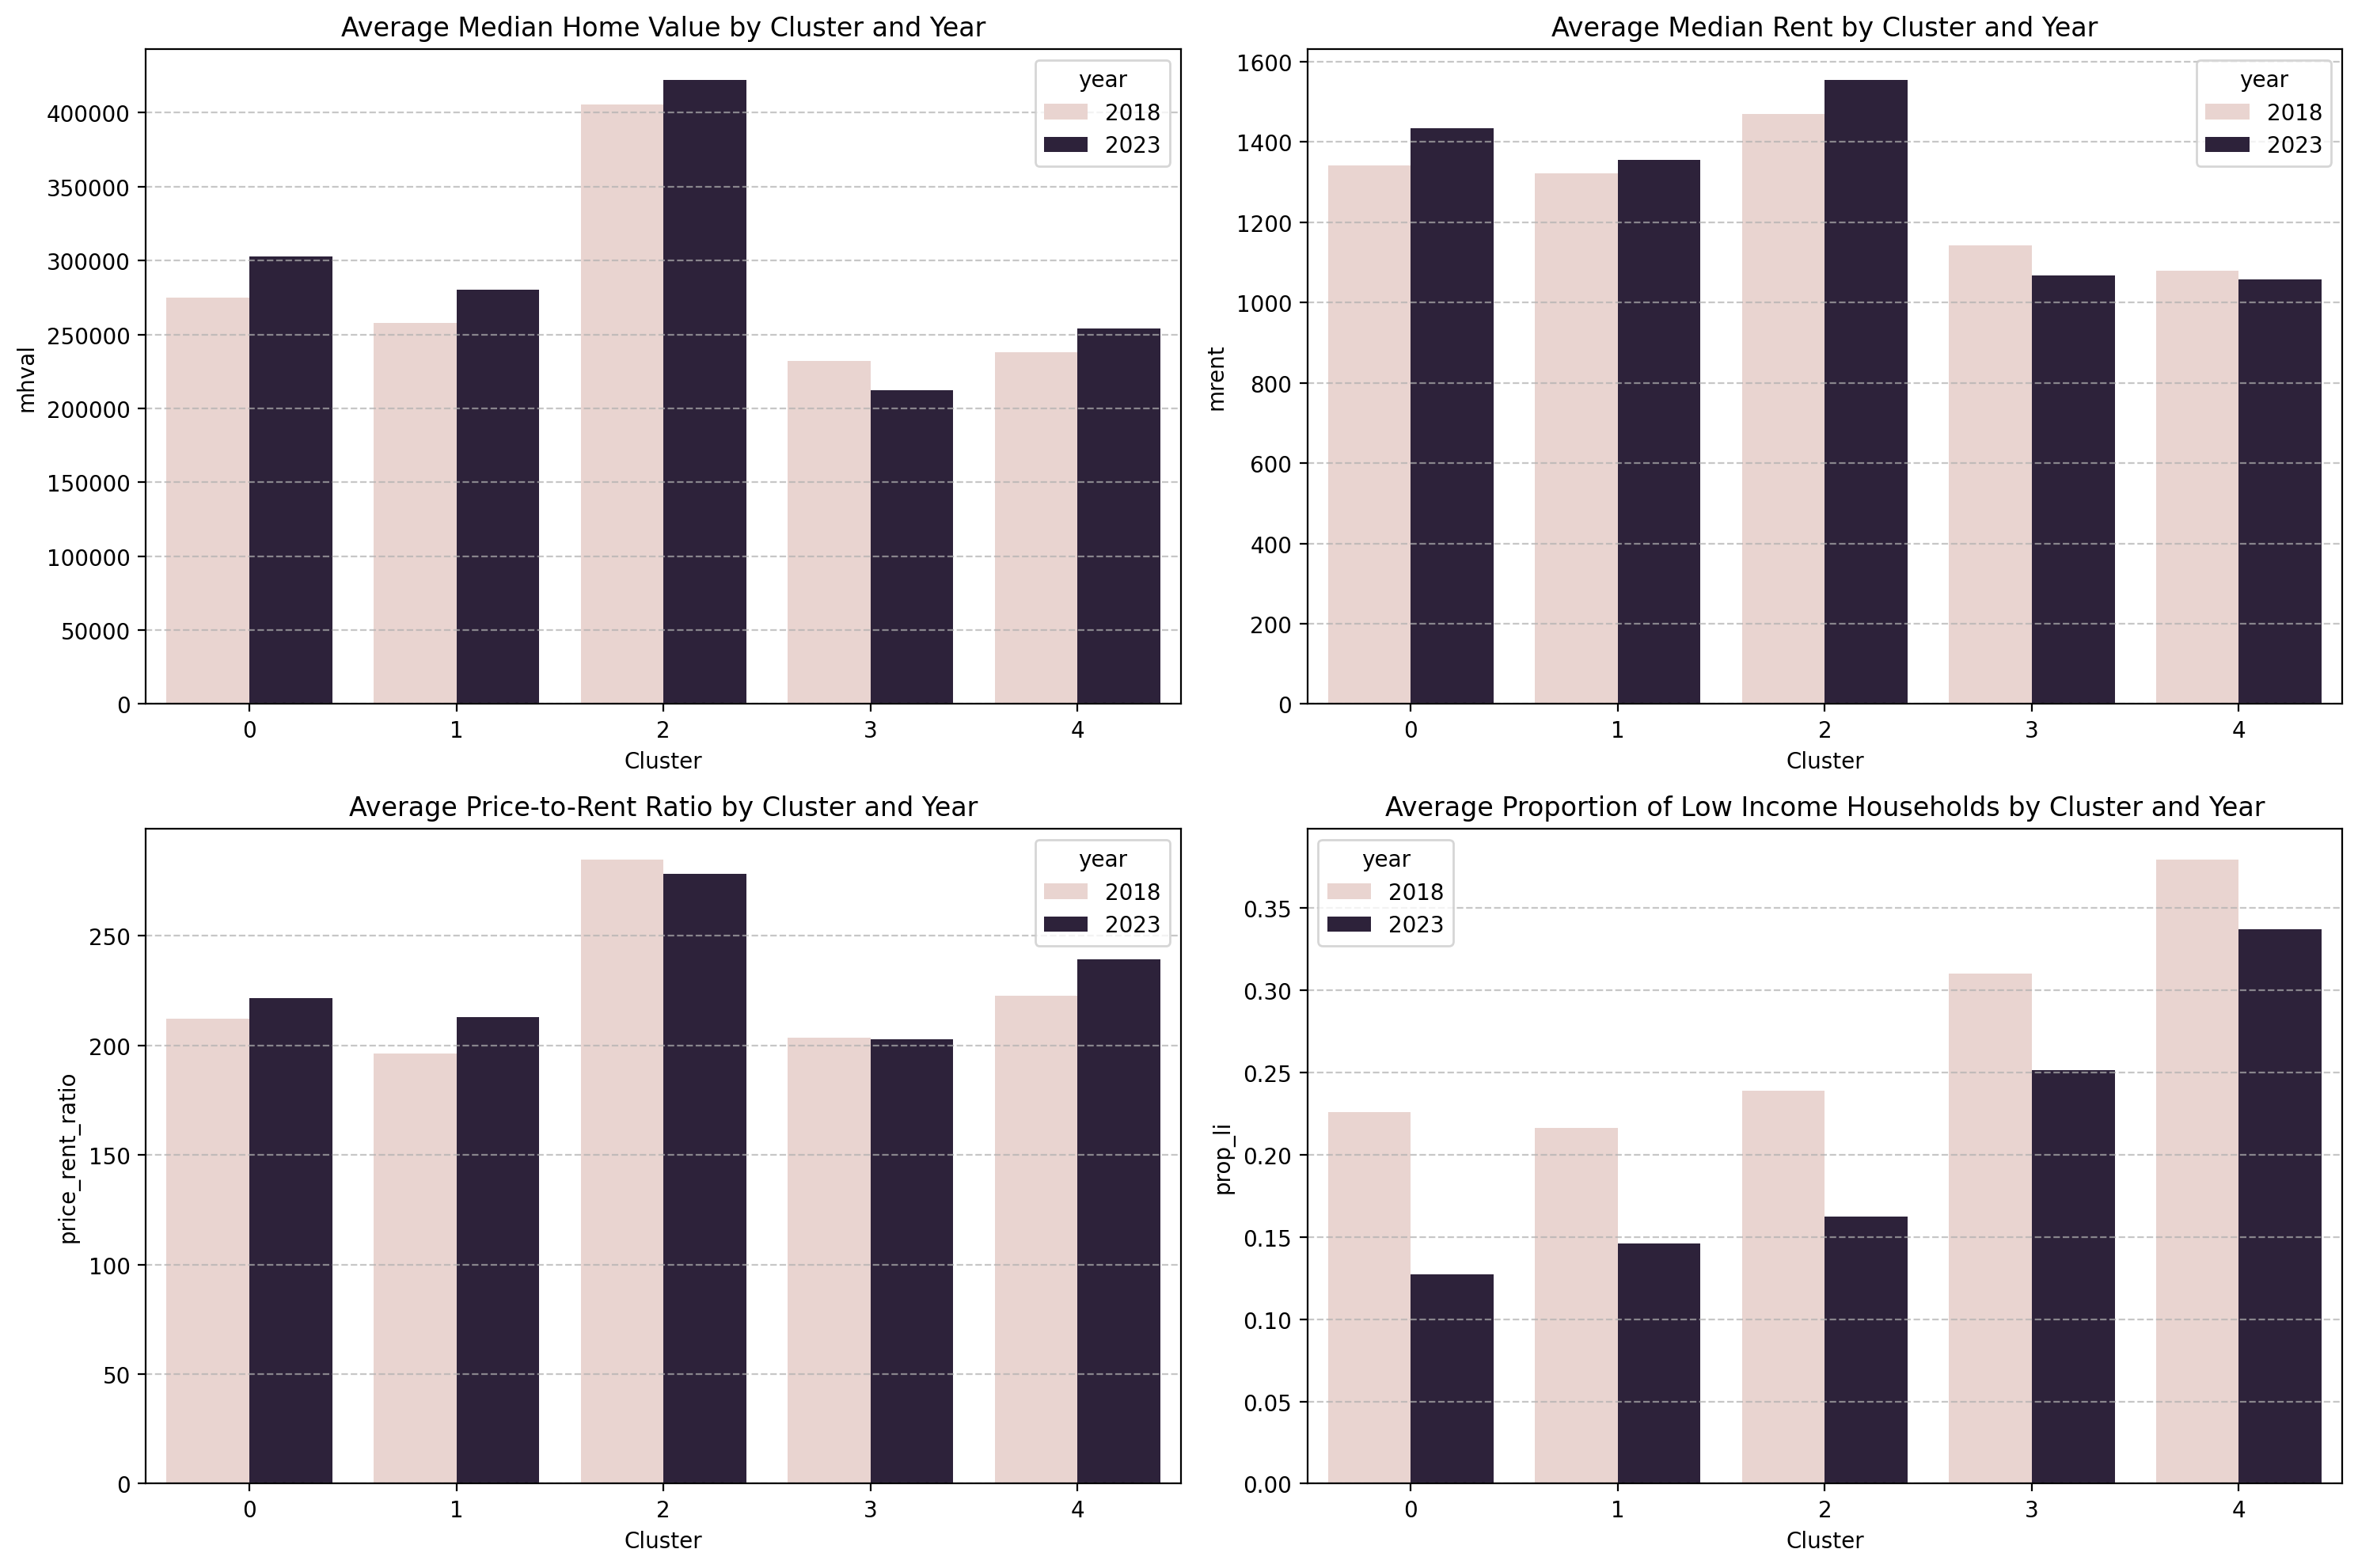

In [71]:
import seaborn as sns
label_mapping = {
    'mhval': 'Median Home Value',
    'mrent': 'Median Rent',
    'price_rent_ratio': 'Price-to-Rent Ratio',
    'prop_li': 'Proportion of Low Income Households'
}

agg_indexes = df_d.groupby(['cluster', 'year'])[['mhval', 'mrent', 'price_rent_ratio', 'prop_li']].mean().reset_index()

# Plot each socioeconomic index in a 2x2 grid
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
indexes = ['mhval', 'mrent', 'price_rent_ratio', 'prop_li']

for i, col in enumerate(indexes):
    ax = axs[i//2, i % 2]
    sns.barplot(data=agg_indexes, x='cluster', y=col, hue='year', ax=ax)
    ax.set_title(f'Average {label_mapping[col]} by Cluster and Year')
    ax.set_xlabel('Cluster')
    ax.set_ylabel(col)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [74]:
migration = df_d.pivot_table(index='FIPS', columns='year', values='cluster', aggfunc='first').dropna()

# Define transitions of interest
transitions = {
    'T3 to T0': ((migration[2018] == 3) & (migration[2023] == 0)),
    'T1 to T2': ((migration[2018] == 1) & (migration[2023] == 2)),
    'T4 to T2': ((migration[2018] == 4) & (migration[2023] == 2))
}

# Initialize a list to collect results
transition_results = []

# Loop over each transition to compute aggregated averages for each variable by year
for label, condition in transitions.items():
    tracts = migration[condition].index  
    subset = df[df['FIPS'].isin(tracts)]
    sub_agg = subset.groupby('year')[['mhval', 'mrent', 'price_rent_ratio', 'prop_li']].mean().reset_index()
    sub_agg['transition'] = label  
    transition_results.append(sub_agg)

# Combine results from all transitions into one DataFrame
df_transitions = pd.concat(transition_results, ignore_index=True)

variables = ['mhval', 'mrent', 'price_rent_ratio', 'prop_li']


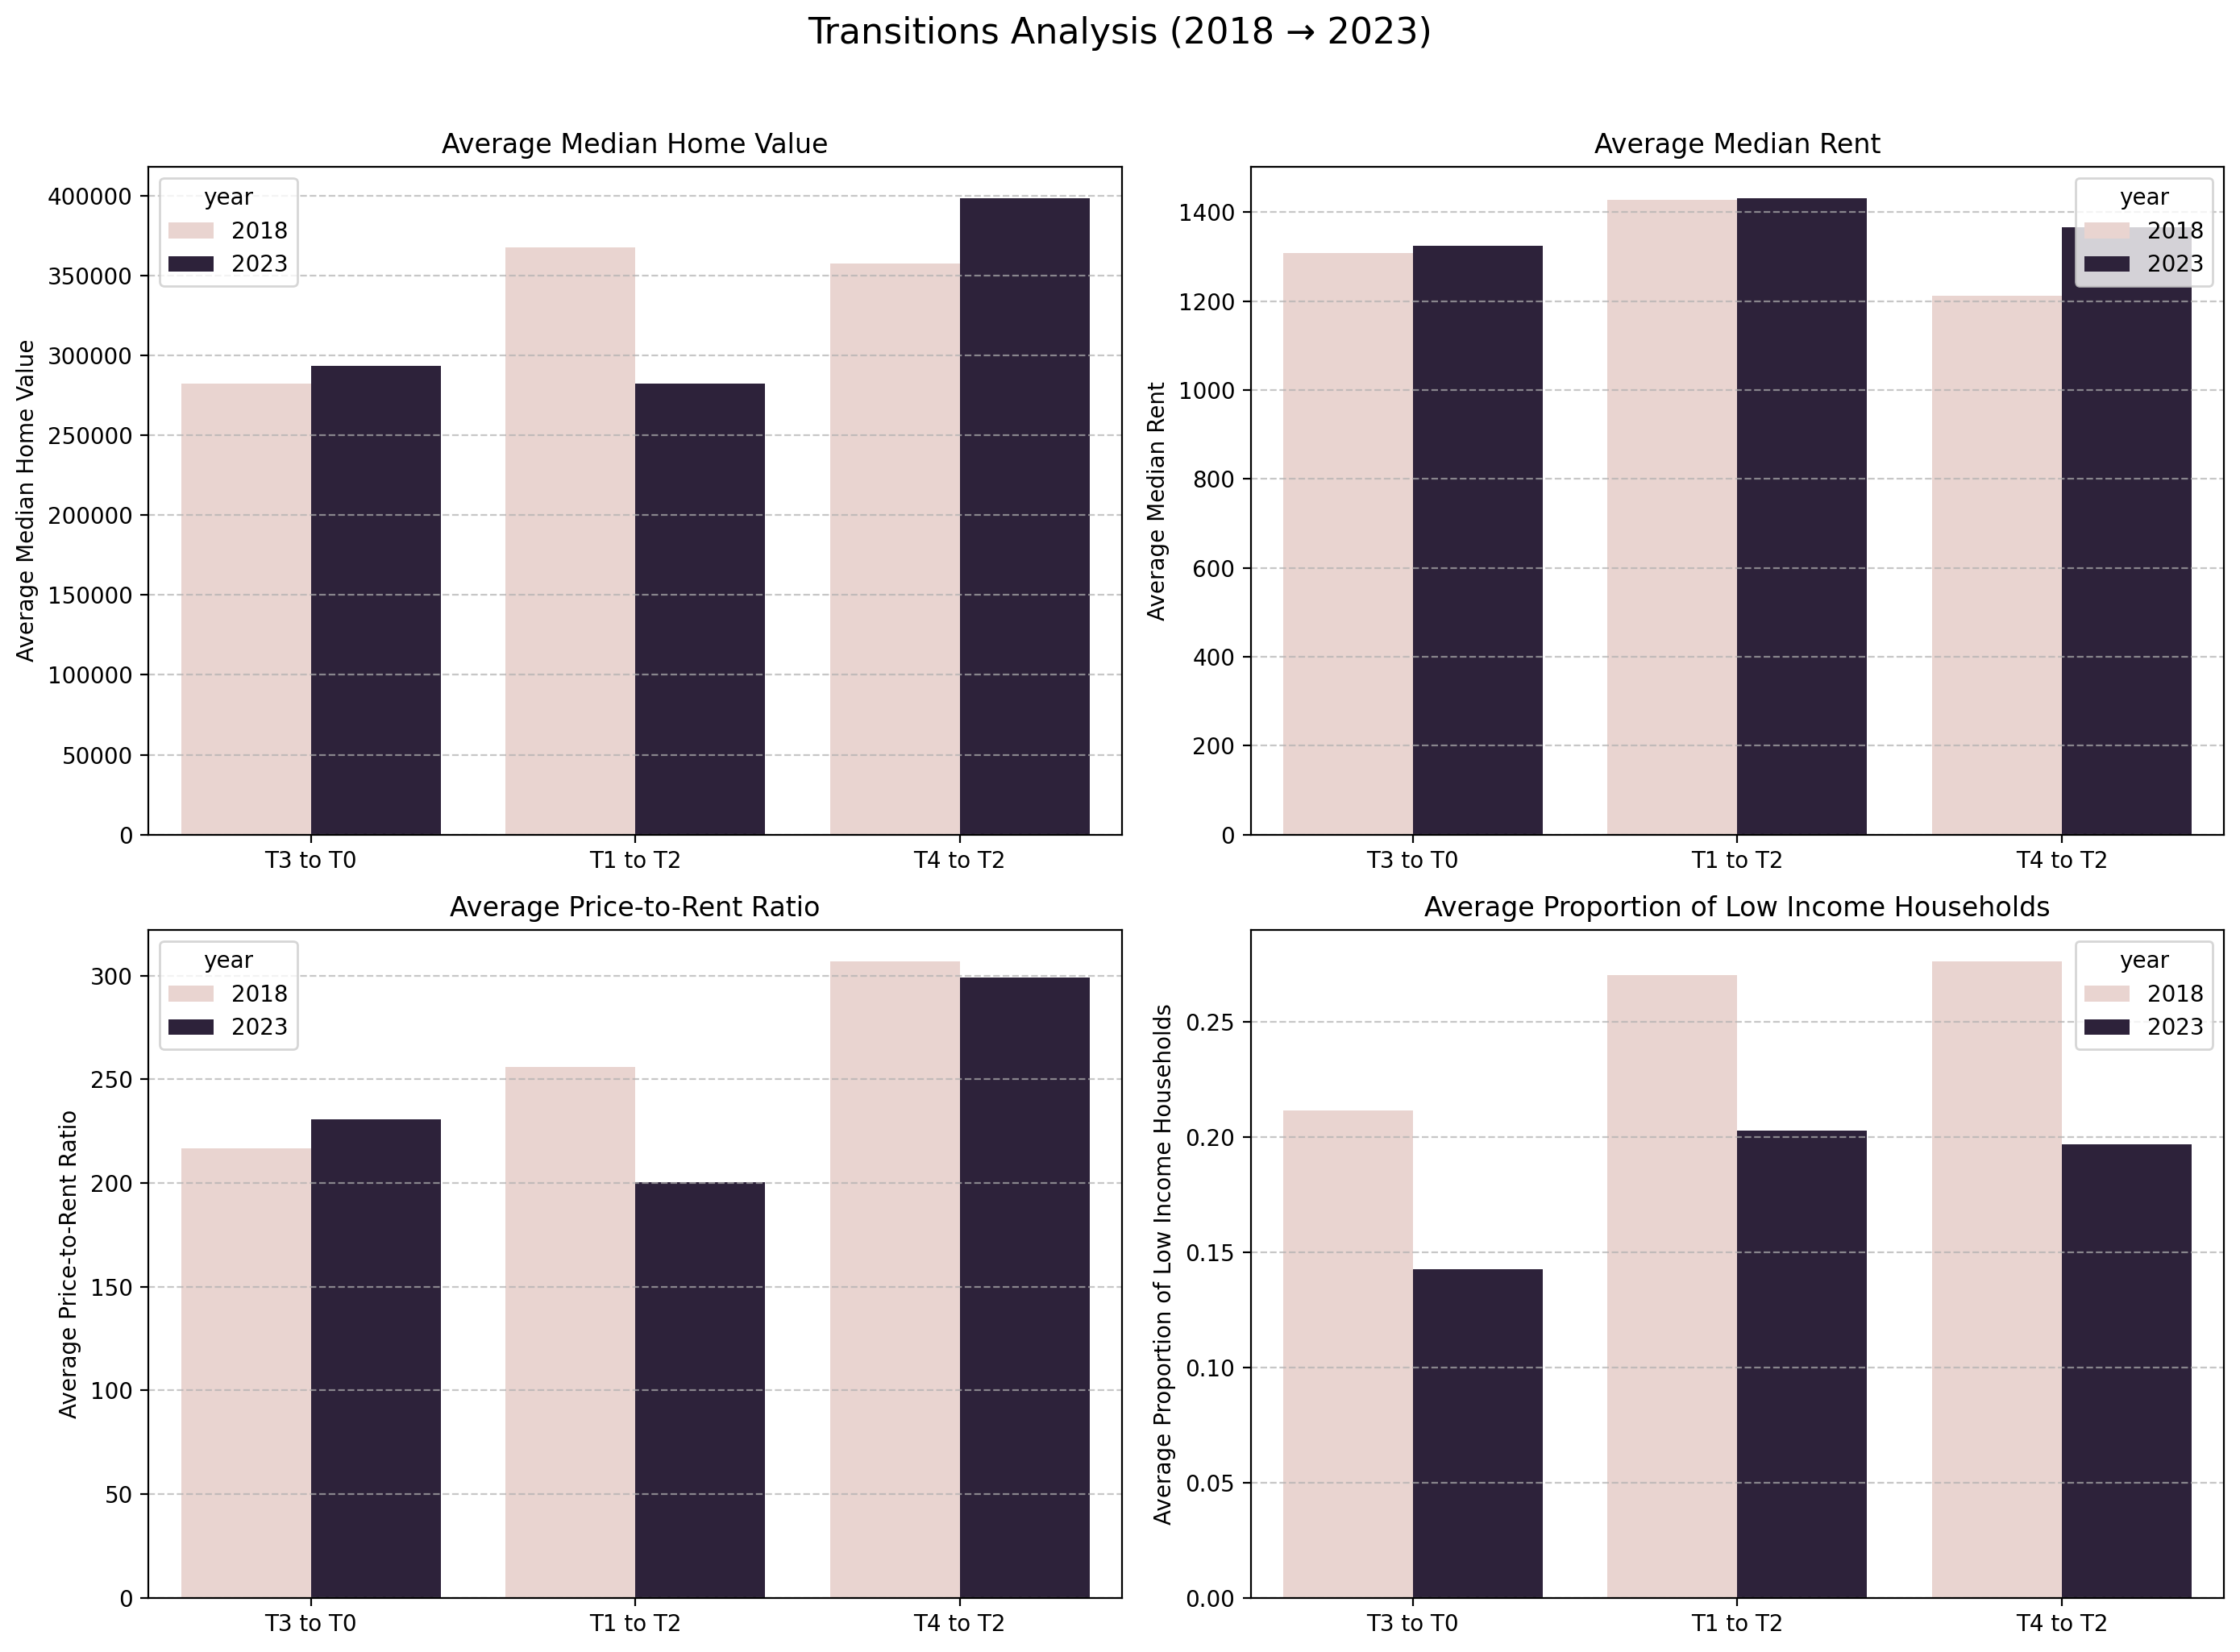

In [75]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

# Loop through variables and plot each in its own subplot
for i, var in enumerate(variables):
    ax = axes[i]
    sns.barplot(data=df_transitions, x='transition', y=var, hue='year', ax=ax)
    ax.set_title(f'Average {label_mapping[var]}')
    ax.set_xlabel('')
    ax.set_ylabel(f'Average {label_mapping[var]}')
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    
# Add a main title and adjust layout
plt.suptitle('Transitions Analysis (2018 → 2023)', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

# Mapping Geographic Changes

In [ ]:
# Filter for Chicago data
chicago_data = df[df['state'] == 17]  # Illinois

# Create separate dataframes for each year
df_2018 = chicago_data[chicago_data['year'] == 2018]
df_2023 = chicago_data[chicago_data['year'] == 2023]


In [11]:
df_2018['FIPS'] = df_2018['FIPS'].astype(str)
df_2023['FIPS'] = df_2023['FIPS'].astype(str)

/var/folders/11/qx8t9mx577s1vr7n1wmm37th0000gn/T/ipykernel_12010/703282124.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018['FIPS'] = df_2018['FIPS'].astype(str)
/var/folders/11/qx8t9mx577s1vr7n1wmm37th0000gn/T/ipykernel_12010/703282124.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023['FIPS'] = df_2023['FIPS'].astype(str)


In [32]:
geofile_path_23 = '2023_tract/tl_2023_17_tract.shp'
geofile_path_18 = '2018_tract/tl_2018_17_tract.shp'

/var/folders/11/qx8t9mx577s1vr7n1wmm37th0000gn/T/ipykernel_12010/1743627393.py:41: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



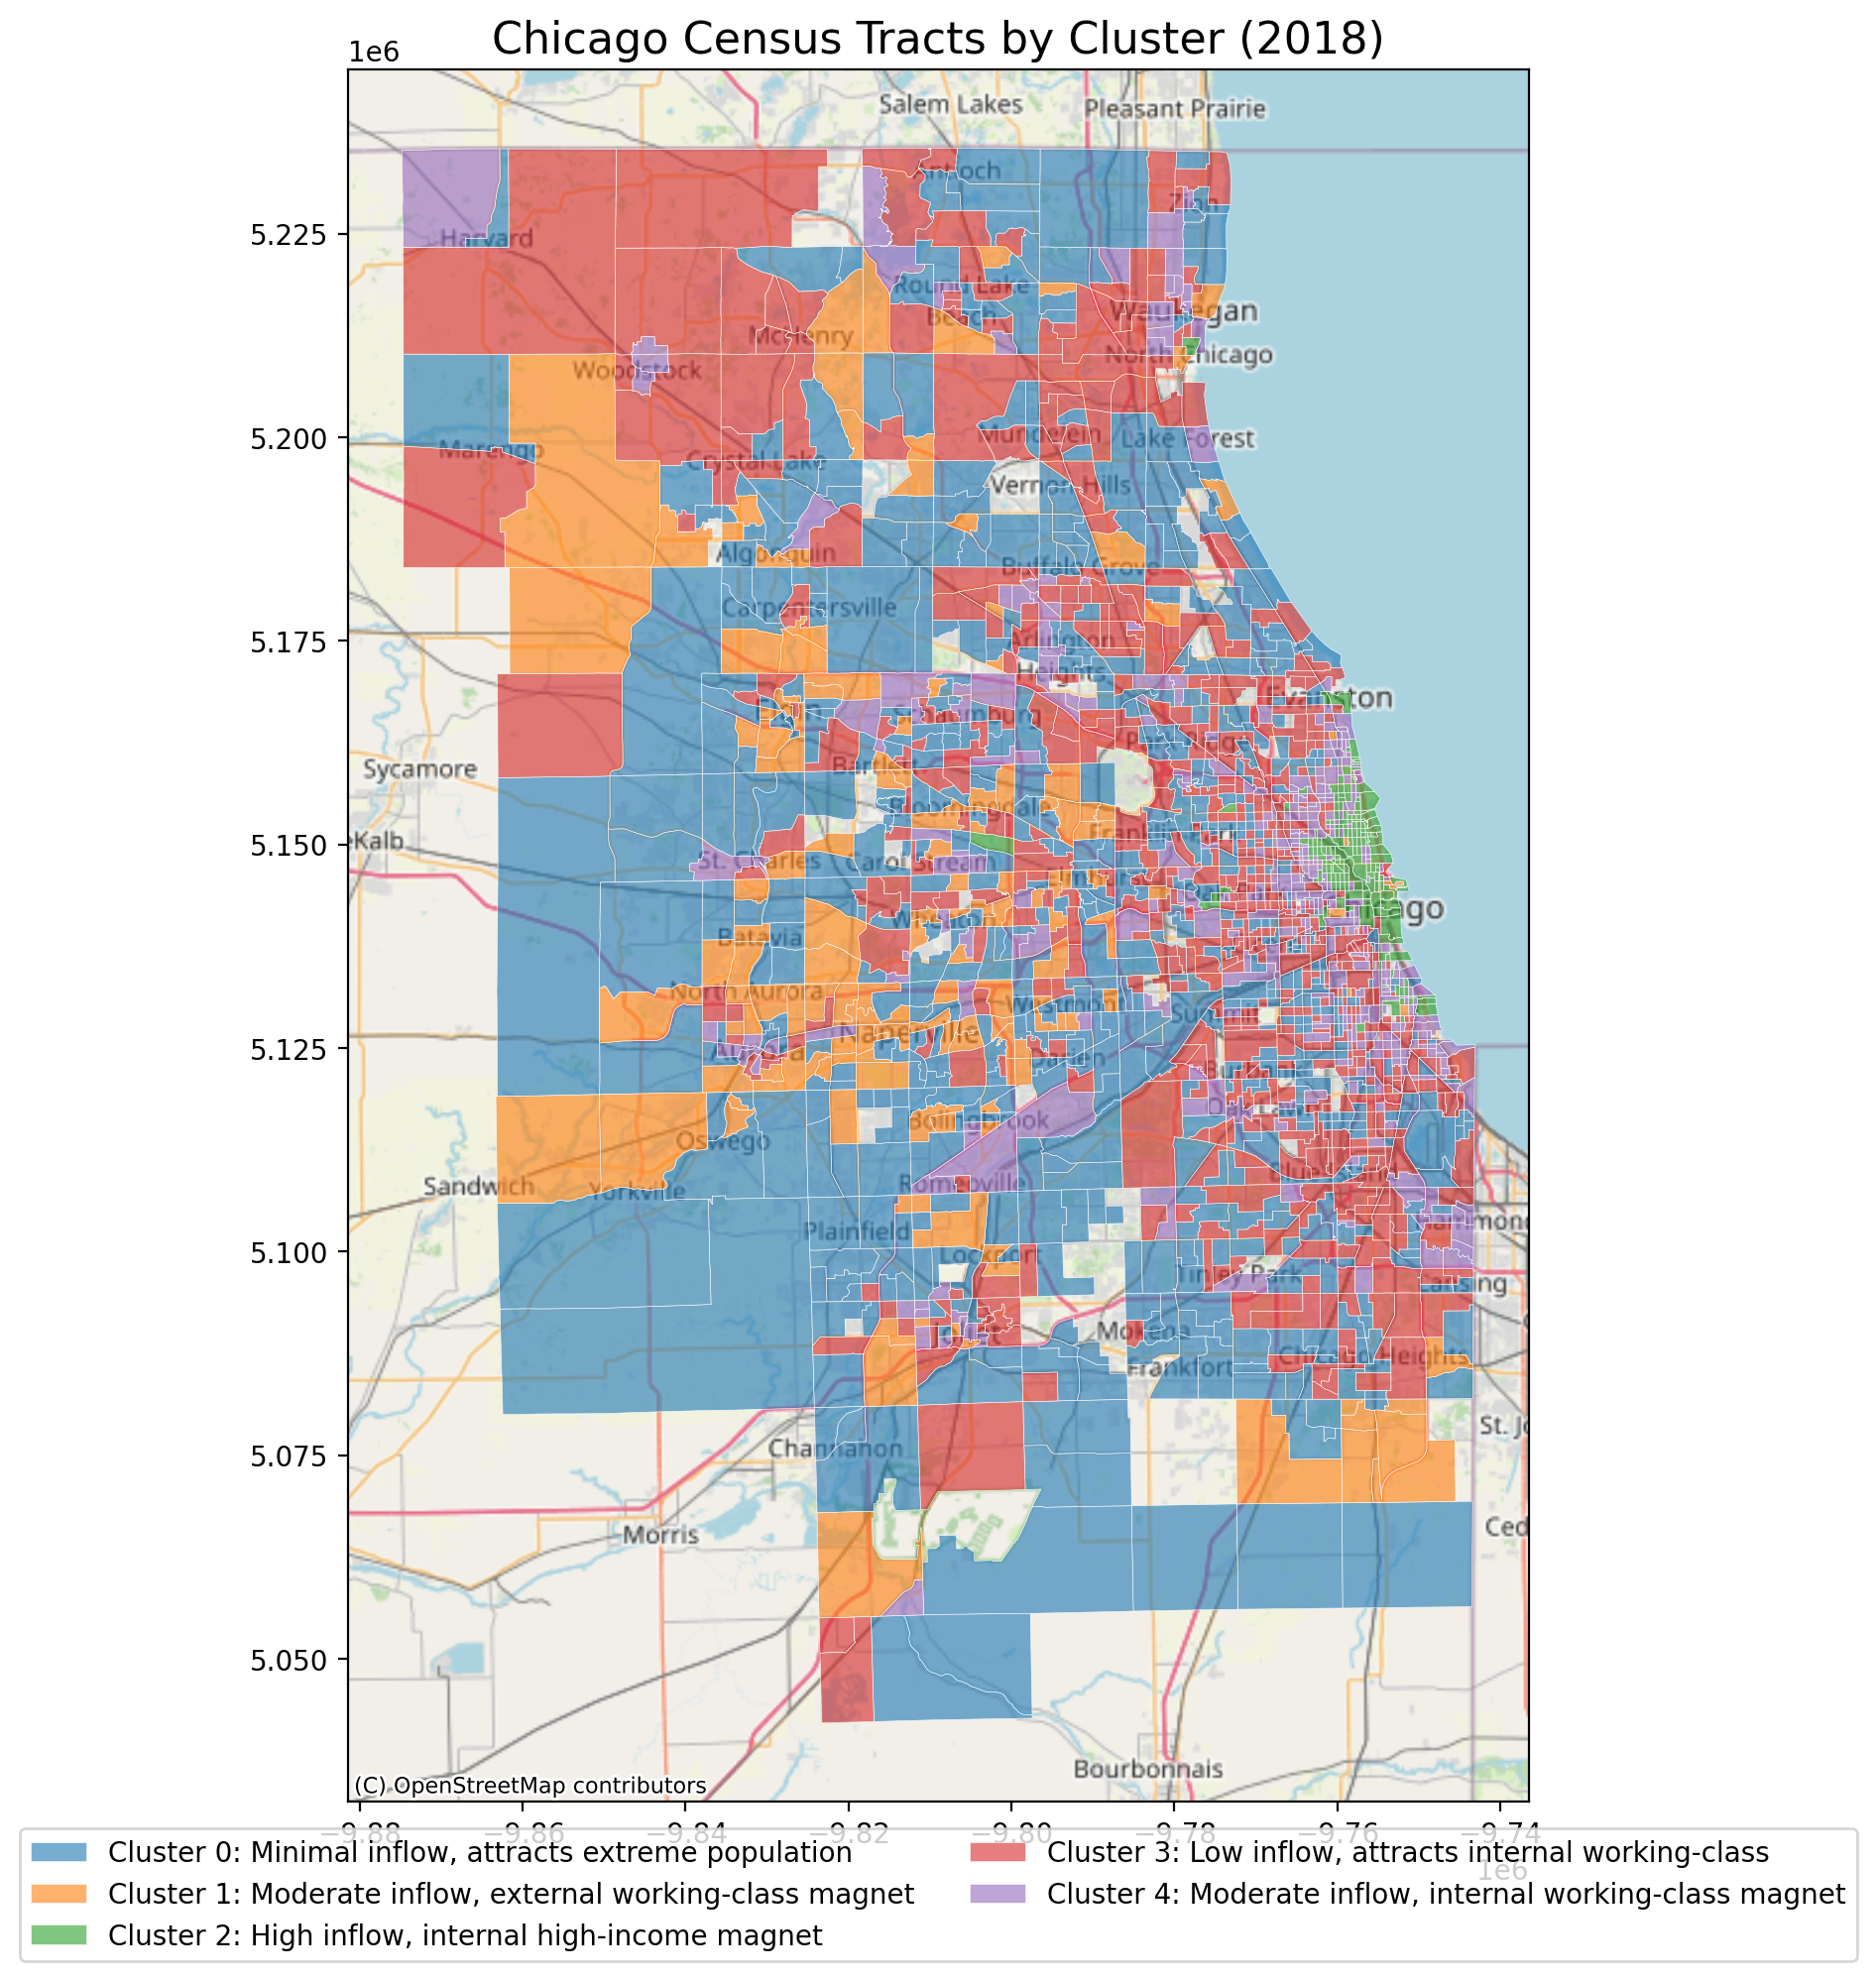

/var/folders/11/qx8t9mx577s1vr7n1wmm37th0000gn/T/ipykernel_12010/1743627393.py:41: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



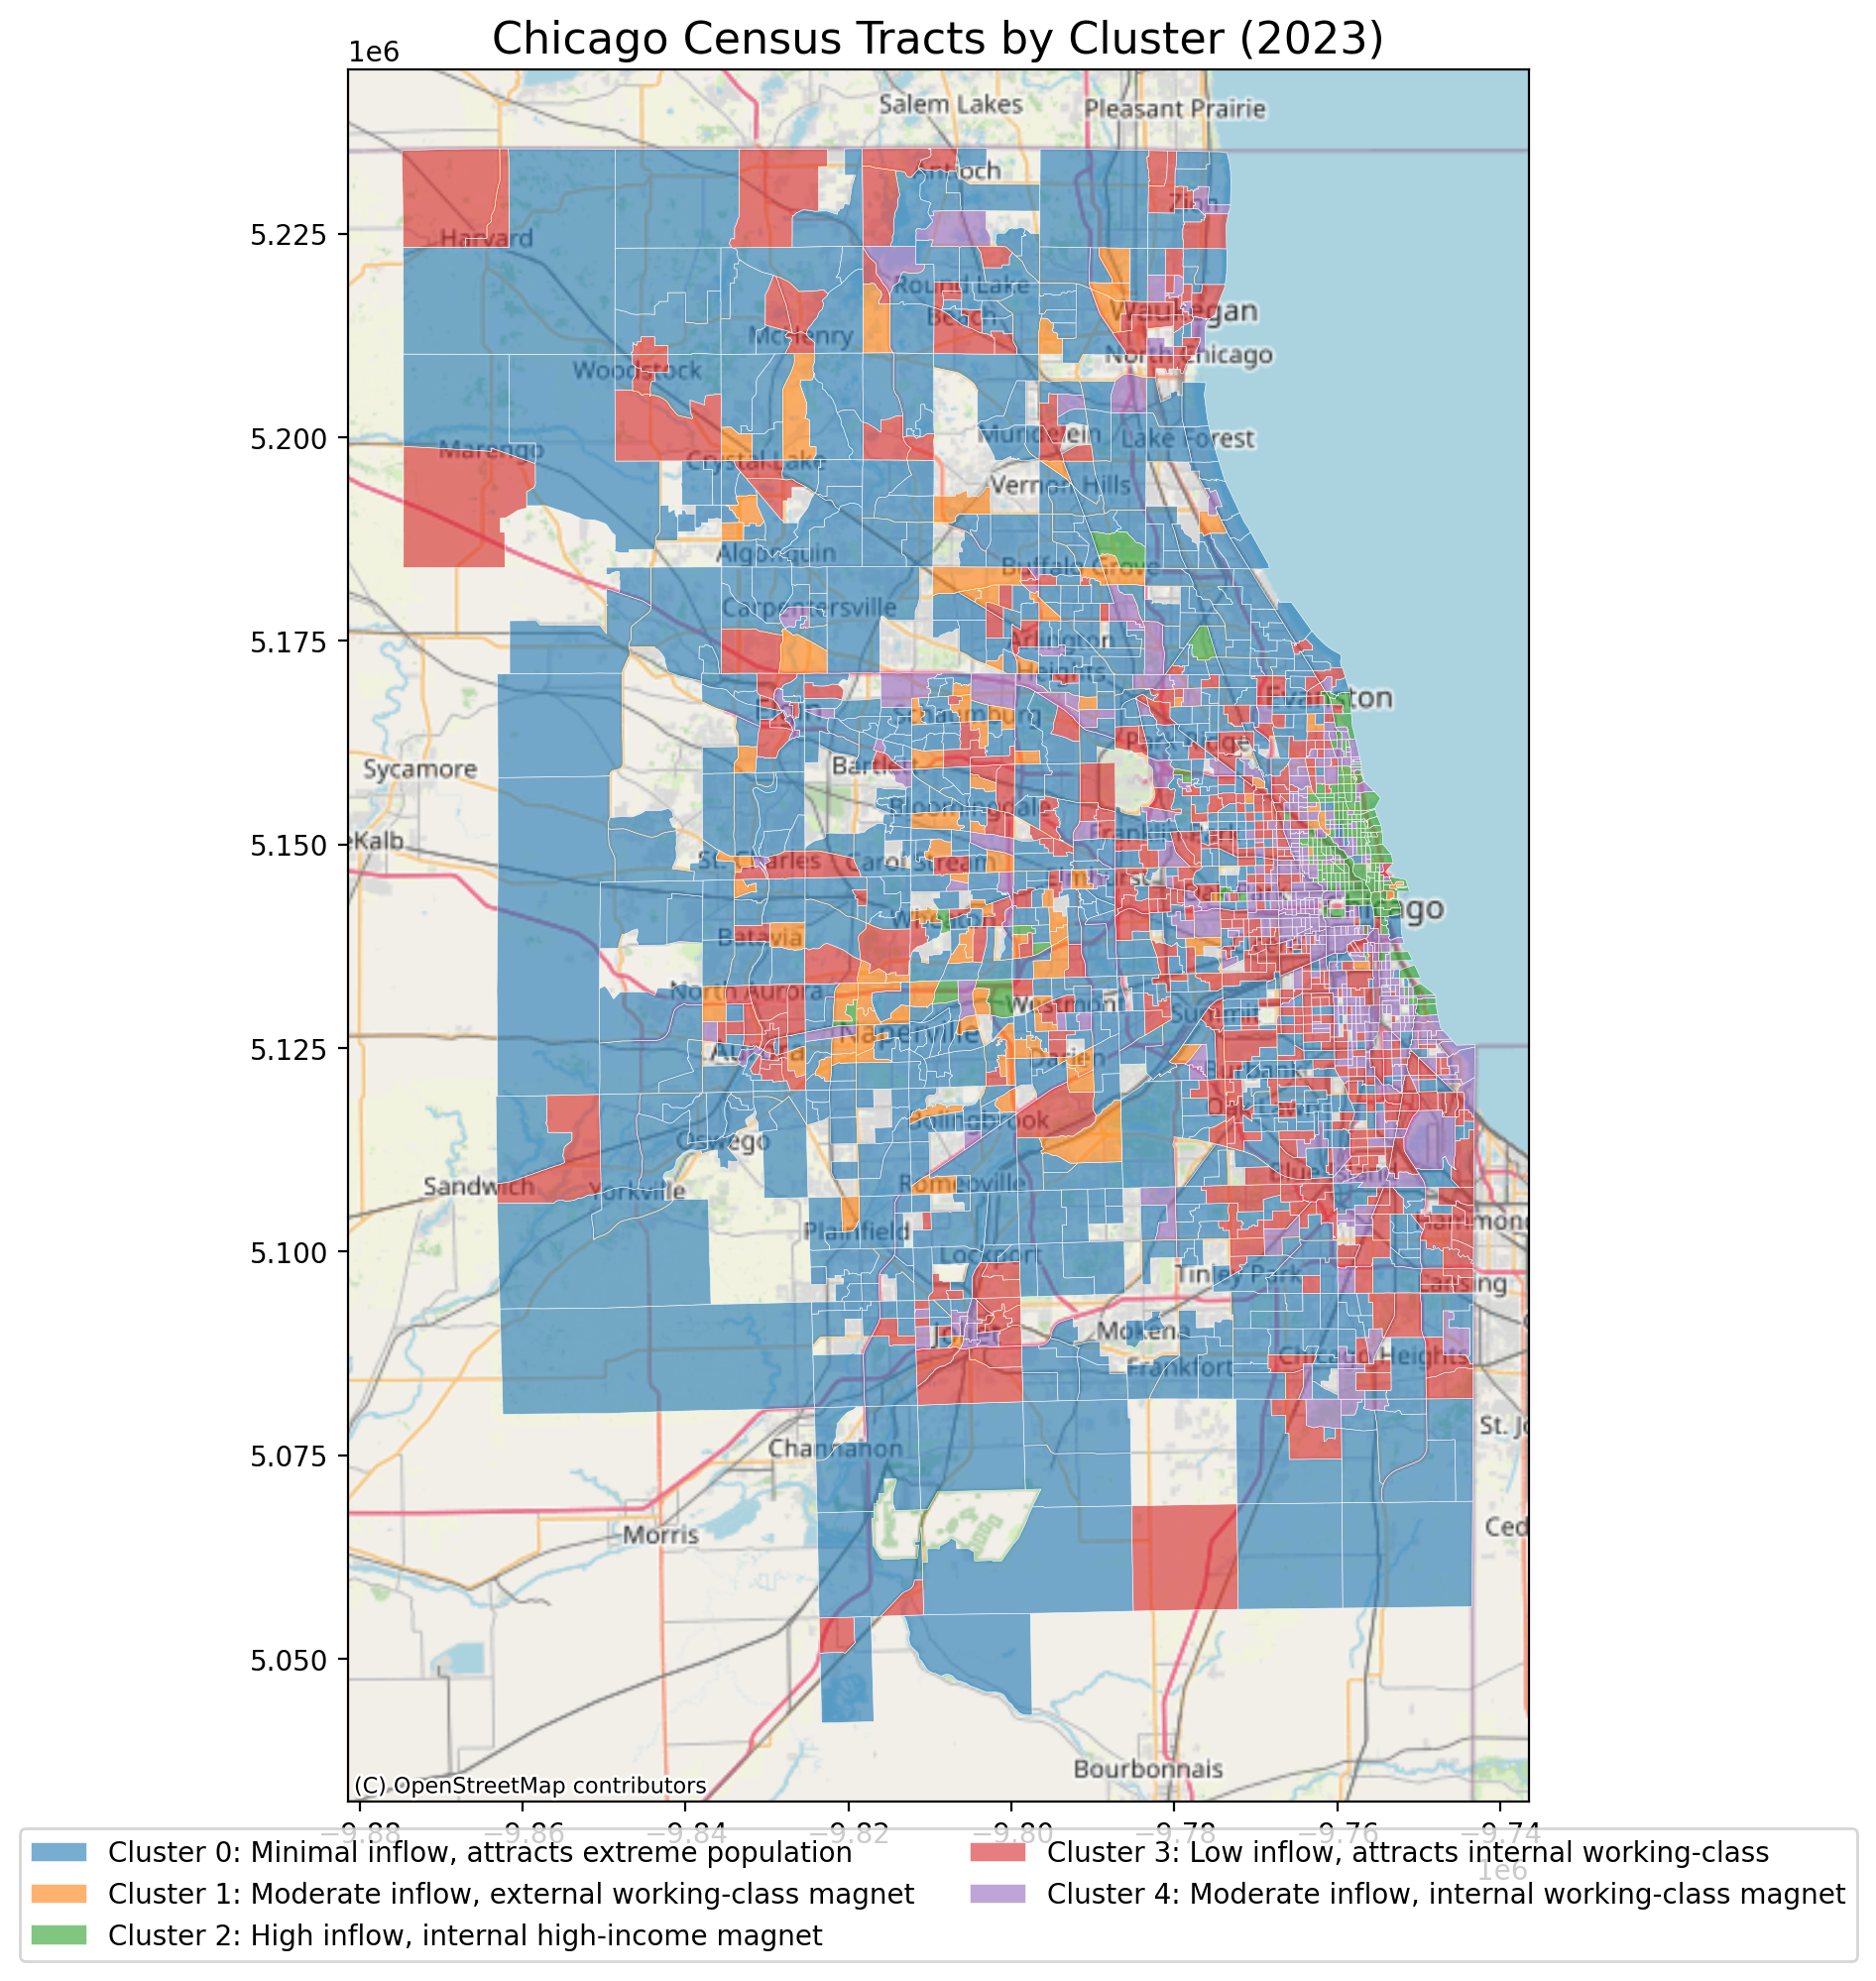

In [ ]:
# Define cluster names
cluster_names = {
    0: "Minimal inflow, attracts extreme population",
    1: "Moderate inflow, external working-class magnet",
    2: "High inflow, internal high-income magnet",
    3: "Low inflow, attracts internal working-class",
    4: "Moderate inflow, internal working-class magnet"
}

# Define colors with transparency (RGBA)
colors = {
    0: (0.122, 0.467, 0.706, 0.6),  # blue with alpha=0.6
    1: (1.000, 0.498, 0.055, 0.6),  # orange with alpha=0.6
    2: (0.173, 0.627, 0.173, 0.6),  # green with alpha=0.6
    3: (0.839, 0.153, 0.157, 0.6),  # red with alpha=0.6
    4: (0.580, 0.404, 0.741, 0.6)   # purple with alpha=0.6
}

# Filter for Chicago area
chicago_data = df[(df['state'] == 17)]

def create_chicago_map(year, geofile_path):
    # Filter data for the given year
    year_data = chicago_data[chicago_data['year'] == year]
    
    # Load census tract shapefile
    tracts = gpd.read_file(geofile_path)
    tracts = tracts.to_crs(epsg=3857)  # Web Mercator projection
    
    # Merge data
    tracts['GEOID'] = tracts['GEOID'].astype(str)
    year_data['FIPS'] = year_data['FIPS'].astype(str)
    chicago_tracts = tracts.merge(year_data, left_on='GEOID', right_on='FIPS', how='inner')
    
    # Create figure
    fig, ax = plt.subplots(figsize=(12, 10))
    
    # Plot each cluster
    for cluster, group in chicago_tracts.groupby('cluster'):
        if cluster in colors:
            group.plot(
                ax=ax, 
                color=colors[cluster], 
                edgecolor='white', 
                linewidth=0.2
            )
    
    # Add basemap - using OpenStreetMap instead of Stamen
    ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
    
    # Create custom legend for discrete categories
    legend_elements = [
        Patch(facecolor=colors[cluster], edgecolor='white', linewidth=0.2,
              label=f"Cluster {cluster}: {name}")
        for cluster, name in cluster_names.items() if cluster in chicago_tracts['cluster'].unique()
    ]
    
    ax.legend(handles=legend_elements, loc='lower center', 
              bbox_to_anchor=(0.5, -0.1), ncol=2)
    
    plt.title(f'Chicago Census Tracts by Cluster ({year})', fontsize=16)
    plt.tight_layout()
    
    # Save figure
    plt.savefig(f'chicago_clusters_{year}.png', dpi=300, bbox_inches='tight')
    plt.show()

# Create maps for each year
create_chicago_map(2018, geofile_path_18)
create_chicago_map(2023, geofile_path_23)

In [26]:
df['cluster'] = df['cluster'].astype(str)

In [ ]:
import plotly.express as px

# Define a color palette
colors = {
    0: '#1f77b4',  # blue
    1: '#ff7f0e',  # orange
    2: '#2ca02c',  # green
    3: '#d62728',  # red
    4: '#9467bd'   # purple
}

# Filter for Chicago area
chicago_data = df[(df['state'] == 17)]  # No Cook County filter for simplicity

def create_interactive_chicago_map(year, geofile_path):
    # Filter data for the given year
    year_data = chicago_data[chicago_data['year'] == year]
    
    # Get census tract geometries
    tracts = gpd.read_file(geofile_path)
    tracts = tracts.to_crs(epsg=4326)  # WGS84 for Plotly
    
    # Convert FIPS codes to the same format for joining
    tracts['GEOID'] = tracts['GEOID'].astype(str)
    year_data['FIPS'] = year_data['FIPS'].astype(str)
    
    # Merge the data with tract geometries
    chicago_tracts = tracts.merge(year_data, left_on='GEOID', right_on='FIPS', how='inner')
    
    # Add cluster name as a new column
    chicago_tracts['cluster_name'] = chicago_tracts['cluster'].map(
        lambda x: f"Cluster {x}: {cluster_names.get(x, '')}"
    )
    
    # Convert cluster to string to ensure discrete color mapping
    chicago_tracts['cluster_str'] = chicago_tracts['cluster'].astype(str)
    
    # Create color mapping dict for string values
    color_map = {str(k): v for k, v in colors.items()}
    
    # Create choropleth map with categorical color scale
    fig = px.choropleth_mapbox(
        chicago_tracts,
        geojson=chicago_tracts.geometry,
        locations=chicago_tracts.index,
        color='cluster_str',  # Use string version for categorical coloring
        color_discrete_map=color_map,
        category_orders={"cluster_str": sorted([str(c) for c in chicago_tracts['cluster'].unique()])},
        hover_name='FIPS',
        hover_data={
            'cluster_str': True,  # Hide redundant cluster number
            'cluster_name': False,
            'pop': True
        },
        labels={
            'pop': 'Population',
            'cluster_name': 'Cluster',
            'cluster_str': 'Cluster'  # Label for the legend
        },
        opacity=0.6,  # More transparent to see the basemap
        mapbox_style="open-street-map",
        zoom=9.5,
        center={"lat": 41.83, "lon": -87.73},  # Center of Chicago
        title=f"Chicago Census Tracts by Cluster ({year})"
    )
    
    # Update layout
    fig.update_layout(
        margin={"r": 0, "t": 40, "l": 0, "b": 0},
        height=800,
        legend_title_text="Clusters"
    )
    
    # Save as HTML
    fig.write_html(f"chicago_clusters_{year}_interactive.html")
    
    return fig

# Create interactive maps for 2018 and 2023
fig_2018 = create_interactive_chicago_map(2018, geofile_path_18)
fig_2023 = create_interactive_chicago_map(2023, geofile_path_23)


/var/folders/11/qx8t9mx577s1vr7n1wmm37th0000gn/T/ipykernel_12010/1573191837.py:39: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/11/qx8t9mx577s1vr7n1wmm37th0000gn/T/ipykernel_12010/1573191837.py:56: DeprecationWarning:

*choropleth_mapbox* is deprecated! Use *choropleth_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/

/var/folders/11/qx8t9mx577s1vr7n1wmm37th0000gn/T/ipykernel_12010/1573191837.py:39: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/11/qx8t9mx